In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [108]:
train = pd.read_csv('train.csv') #Creates Dataframe form the csv filea
test = pd.read_csv('test.csv')
print("Train data shape: ", train.shape)#Prints size of the data of train and test
print("Test data shape: ", test.shape)


Train data shape:  (1460, 81)
Test data shape:  (1459, 80)


In [109]:
print(train.head())#Prints rows from train


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008     

In [110]:
plt.style.use(style='ggplot')#plotting
plt.rcParams['figure.figsize'] = (10,6)


In [111]:
print(train.SalePrice.describe())#printing info

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


Skew is:  1.8828757597682129


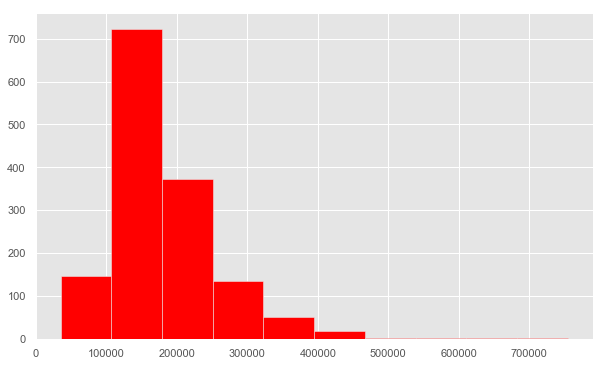

In [112]:
print("Skew is: ", train.SalePrice.skew())
plt.hist(train.SalePrice, color='red')
plt.show()#prints graph 

Skew is:  0.12133506220520406


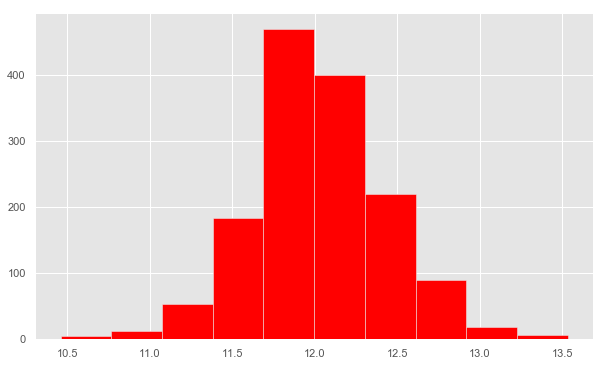

In [113]:
target = np.log(train.SalePrice)
print("Skew is: ", target.skew())
plt.hist(target, color='red')
plt.show()

In [114]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print(corr['SalePrice'].sort_values(ascending=False)[:5])
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


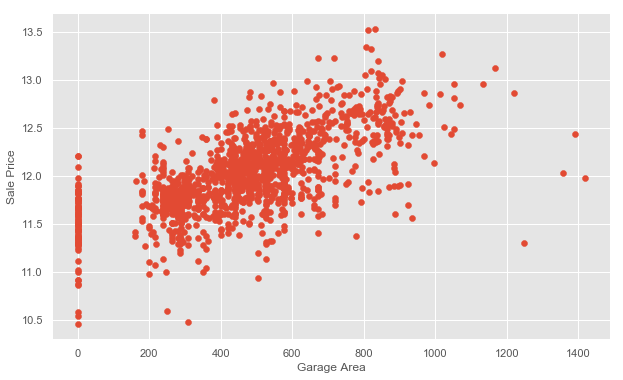

In [115]:
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()#Shows relation between sale price & garage area

In [116]:
train = train[train['GarageArea'] < 1200]#Eilimates some outliers

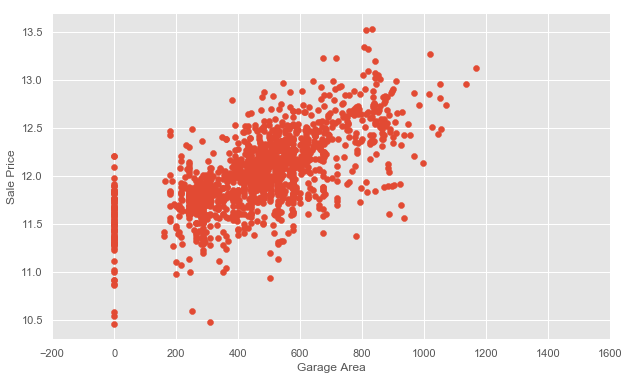

In [117]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600)#used to display the same scale as graph with outliers
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

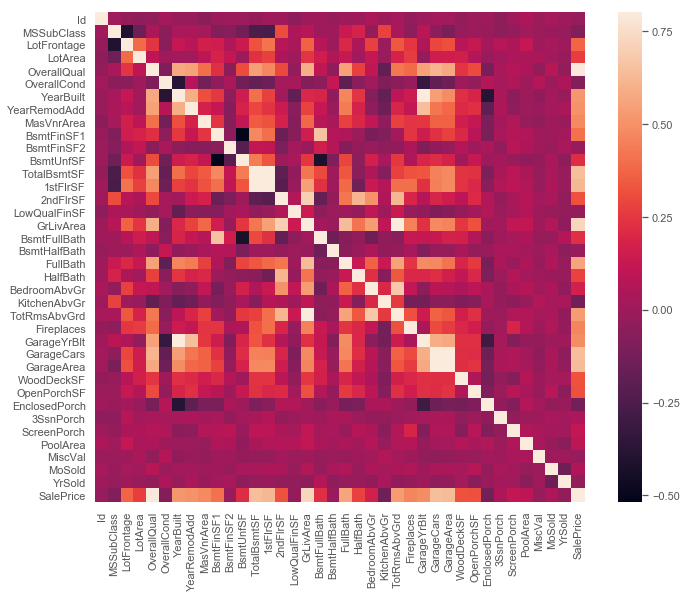

In [118]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

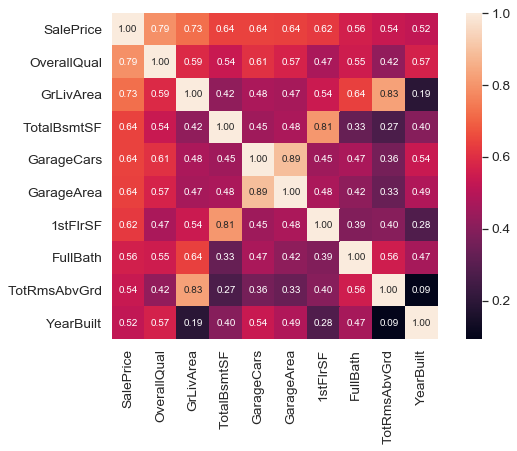

In [119]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [120]:
train = train.drop("TotRmsAbvGrd", 1) # axis 1 for column
test = test.drop("TotRmsAbvGrd", 1)

In [121]:
train = train.drop("GarageArea", 1) 
test = test.drop("GarageArea", 1)

In [122]:
train = train.drop("FullBath",1)
test = test.drop("FullBath",1)

In [123]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

KeyError: "['FullBath'] not in index"

In [124]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False) [:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)#returns the count of nulls values in columns

              Null Count
Feature                 
PoolQC              1449
MiscFeature         1402
Alley               1364
Fence               1174
FireplaceQu          689
LotFrontage          258
GarageCond            81
GarageType            81
GarageYrBlt           81
GarageFinish          81
GarageQual            81
BsmtFinType2          38
BsmtExposure          38
BsmtCond              37
BsmtQual              37
BsmtFinType1          37
MasVnrArea             8
MasVnrType             8
Electrical             1
LandSlope              0
RoofStyle              0
MSSubClass             0
MSZoning               0
LotArea                0
Foundation             0


In [125]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1449,0.995876
MiscFeature,1402,0.963574
Alley,1364,0.937457
Fence,1174,0.806873
FireplaceQu,689,0.473540
LotFrontage,258,0.177320
GarageCond,81,0.055670
GarageType,81,0.055670
GarageYrBlt,81,0.055670
GarageFinish,81,0.055670


In [126]:
categoricals = train.select_dtypes(exclude=[np.number])
print(categoricals.describe())#Count column - non-null obsverations / unique - count of unique values / top most common occurring value / freq freq of top value

       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1455   1455    91     1455        1455      1455      1455   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1147   1450    50      921        1309      1454      1048   

       LandSlope Neighborhood Condition1      ...      GarageType  \
count       1455         1455       1455      ...            1374   
unique         3           25          9      ...               6   
top          Gtl        NAmes       Norm      ...          Attchd   
freq        1378          225       1257      ...             867   

       GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence  \
count          1374       1374       1374       1455      6    281   
unique            3          5          5          3      3      4   
top             Unf         TA         TA          Y     Ex  MnPrv   
freq    

In [127]:
print("original: \n")
print(train.Street.value_counts(), "\n")#original view of the street data


original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 



In [128]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(test.Street, drop_first=True)

In [129]:
print("Encoded: \n")
print(train.enc_street.value_counts())#encoded views of the street data. Helps the model to understand whether or not a observation falls into one category or another

Encoded: 

1    1450
0       5
Name: enc_street, dtype: int64


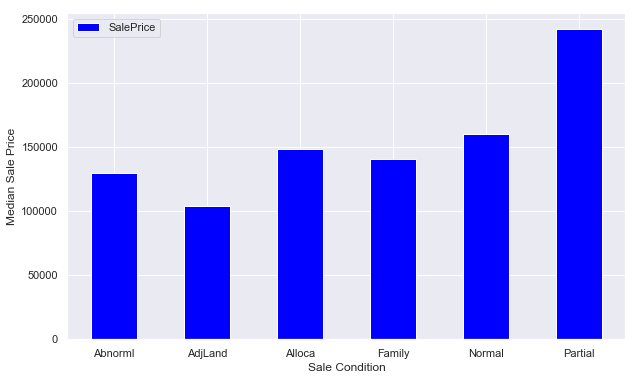

In [130]:
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar',color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()#Views SaleCondition

In [131]:
def encode(x): return 1 if x == 'Partial' else 0 
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)#encodes data so that if salecondition is equal to patrial, 1 is assigned

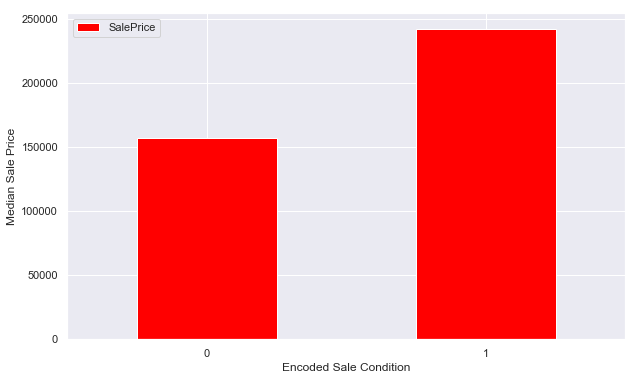

In [132]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar',color='red')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()#Encoded plot

In [133]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [134]:
print(sum(data.isnull().sum() != 0))#checks if columns have null values / probs can be deleted

0


In [135]:
#Linear Model
y = np.log(train.SalePrice)#target variable
x = data.drop(['SalePrice', 'Id'], axis=1)#tells which columns to exclude

In [136]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)

In [137]:
lr = linear_model.LinearRegression()

In [138]:
model = lr.fit(x_train, y_train)

In [139]:
print("R^2 is: \n", model.score(x_test, y_test))#Value measure of how close the data are to the fitted regression line / higher r^2 value means a better fit

R^2 is: 
 0.8901396594964187


In [140]:
predictions = model.predict(x_test)

In [141]:
print("RMSE is: \n", mean_squared_error(y_test, predictions))#Root-mean-squared-error / takes two arrays and calc the rmse / measure the distance between the predicted values and actual values

RMSE is: 
 0.017539745178784382


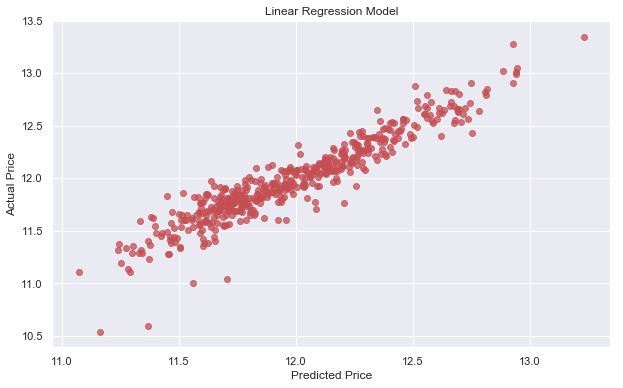

In [142]:
#Scatter plot
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75, color='r')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

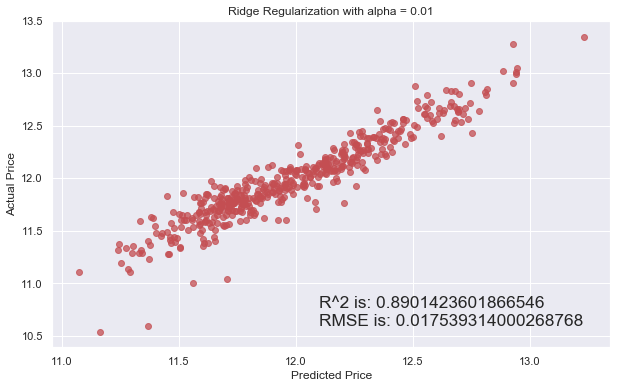

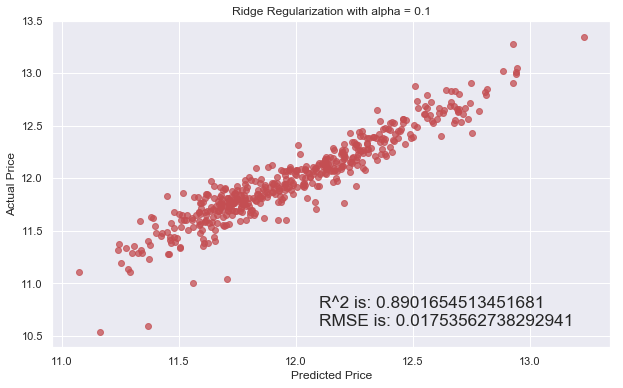

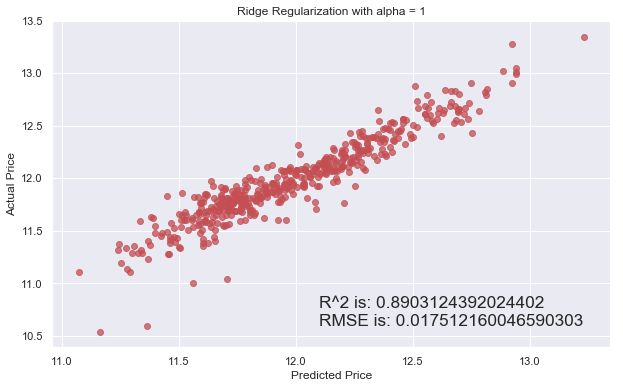

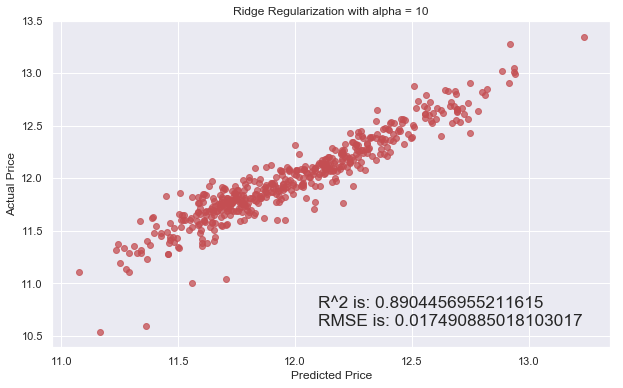

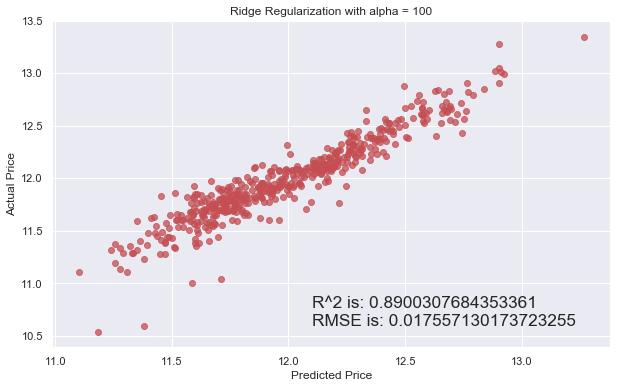

In [143]:
for i in range(-2,3):#loops through different alphas
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(x_train, y_train)
    preds_ridge = ridge_model.predict(x_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75,color='r')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(ridge_model.score(x_test,y_test),mean_squared_error(y_test,preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()
    

In [144]:
submission = pd.DataFrame()
submission['Id'] = test.Id

In [145]:
feats = test.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()

In [146]:
predictions = model.predict(feats)

In [147]:
final_predictions = np.exp(predictions)

In [148]:
print("Original Predictions were: \n", predictions[:10], "\n")
print("Final Predictions are: \n", final_predictions[:10])

Original Predictions were: 
 [11.69145556 11.75665317 12.09150084 12.20461348 12.11135222 12.06019752
 12.1715199  12.01655536 12.19486239 11.67834662] 

Final Predictions are: 
 [119545.88606923 127599.68387808 178349.57997156 199708.37891076
 181925.4421619  172853.12490785 193207.47678516 165471.68264086
 197770.46859881 117988.99365426]


In [149]:
submission["SalePrice"] = final_predictions


In [150]:
print(submission.head())

     Id      SalePrice
0  1461  119545.886069
1  1462  127599.683878
2  1463  178349.579972
3  1464  199708.378911
4  1465  181925.442162


In [151]:
submission.to_csv('SumbmissionFinal2.csv', index=False)